In [1]:
from z3 import *
import numpy as np
import random
import arviz as az
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.autolayout"] = True # to for tight_layout()

import os, sys
sys.path.append(os.path.join("../../../../"))

# our library
from src.mcmc_sat import mcmc, sat, smt

In [2]:
def gen_conf_matrix(y: np.ndarray):
    """
    Simple function to generate the configuration matrix for variable number of roads
    """
    num_vers = y.size+1
    num_pathways = num_vers-1

    pathways = []
    for i in range(1,num_vers+1):
        for j in range(1,num_vers+1):
            if i < j:
                pathways += [(i,j)]

    print(pathways)

    return np.array([[ 1 if (p1<=i and i<p2) else 0 for (p1,p2) in pathways] for i in range(1, num_pathways+1)])    

In [3]:
A = np.array([[1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
              [0,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
              [0,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0],
              [0,0,0,1,1,1,1,0,0,1,1,1,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0],
              [0,0,0,0,1,1,1,0,0,0,1,1,1,0,0,1,1,1,0,1,1,1,1,1,1,0,0,0],
              [0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,1,1,0,0,1,1,0,1,1,1,1,0],
              [0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,1]])

y=np.array([1087, 1008, 1068, 1204, 1158, 1151, 1143])

In [4]:
num_con = 5
# yprime  = y[:num_con]
yprime  = np.array([int(i/11) for i in y[:num_con]]) 
Aprime  = gen_conf_matrix(yprime)

# y = yprime
# A = Aprime

print(Aprime)
print(yprime)
print([sum(x) for x in Aprime])

[(1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (2, 3), (2, 4), (2, 5), (2, 6), (3, 4), (3, 5), (3, 6), (4, 5), (4, 6), (5, 6)]
[[1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 1 1 1 1 1 0 0 0 0 0 0]
 [0 0 1 1 1 0 1 1 1 1 1 1 0 0 0]
 [0 0 0 1 1 0 0 1 1 0 1 1 1 1 0]
 [0 0 0 0 1 0 0 0 1 0 0 1 0 1 1]]
[ 98  91  97 109 105]
[5, 8, 9, 8, 5]


In [5]:
# always num_bits >= log2(max_int_bv) + 2 (not sure why, possibly due to overflows)
# log entry 1: it took an hour and a half to solve (with cmsgen) the roads problem with this y vector np.array([int(i/11) for i in y[:num_con]])  and num_con = 7
# log entry 2: it is important to ensure that `max_int_bv` fits in 2^(num_bits - 2) otherwise there might be overflows (at least with the configuration np.array([int(i/11) for i in y[:num_con]]) and num_con = 5)
trace = mcmc.sample_mh_trace_from_conf_matrix_sat(A=Aprime,y=yprime,
                                                  num_bits=7,
                                                  max_int_bv=(2**5)-1,
                                                  backend='cmsgen',
                                                  num_samples=1000)

c CMSGen Copyright Mate Soos (soos.mate@gmail.com)
c CMSGen SHA revision 00791438b32bb387e1f6ba7c1b211d7f6595aa06
c CMSGen is MIT licensed
c CMSGen compilation env CMAKE_CXX_COMPILER = /usr/bin/c++ | CMAKE_CXX_FLAGS =  -fno-stack-protector -mtune=native -Wlogical-op -Wrestrict -Wnull-dereference -Wdouble-promotion -Wshadow -Wformat=2 -Wextra-semi -pedantic | COMPILE_DEFINES =  -DNDEBUG -D_FORTIFY_SOURCE=0 -DUSE_GAUSS -DUSE_ZLIB -DYALSAT_FPU | STATICCOMPILE = ON | ZLIB_FOUND = TRUE | VALGRIND_FOUND =  | ENABLE_TESTING = ON | SLOW_DEBUG = OFF | ENABLE_ASSERTIONS = OFF | MY_TARGETS =  | LARGEMEM =  | LIMITMEM =  | 
c CMSGen compiled with gcc version 9.4.0
c executed with command line: cmsgen --samples 1000 --samplefile cmsgen_input/cmsgen_samples.out cmsgen_input/z3_problem.cnf
c Writing samples to file: cmsgen_input/cmsgen_samples.out


c Number of samples found until now:     10


c Number of samples found until now:     20


c Number of samples found until now:     30


c Number of samples found until now:     40


c Number of samples found until now:     50


c Number of samples found until now:     60


c Number of samples found until now:     70


c Number of samples found until now:     80


c Number of samples found until now:     90


c Number of samples found until now:    100


c Number of samples found until now:    110


c Number of samples found until now:    120


c Number of samples found until now:    130


c Number of samples found until now:    140


c Number of samples found until now:    150


c Number of samples found until now:    160


c Number of samples found until now:    170


c Number of samples found until now:    180


c Number of samples found until now:    190


c Number of samples found until now:    200


c Number of samples found until now:    210


c Number of samples found until now:    220


c Number of samples found until now:    230


c Number of samples found until now:    240


c Number of samples found until now:    250


c Number of samples found until now:    260


c Number of samples found until now:    270


c Number of samples found until now:    280


c Number of samples found until now:    290


c Number of samples found until now:    300


c Number of samples found until now:    310


c Number of samples found until now:    320


c Number of samples found until now:    330


c Number of samples found until now:    340


c Number of samples found until now:    350


c Number of samples found until now:    360


c Number of samples found until now:    370


c Number of samples found until now:    380


c Number of samples found until now:    390


c Number of samples found until now:    400


c Number of samples found until now:    410


c Number of samples found until now:    420


c Number of samples found until now:    430


c Number of samples found until now:    440


c Number of samples found until now:    450


c Number of samples found until now:    460


c Number of samples found until now:    470


c Number of samples found until now:    480


c Number of samples found until now:    490


c Number of samples found until now:    500


c Number of samples found until now:    510


c Number of samples found until now:    520


c Number of samples found until now:    530


c Number of samples found until now:    540


c Number of samples found until now:    550


c Number of samples found until now:    560


c Number of samples found until now:    570


c Number of samples found until now:    580


c Number of samples found until now:    590


c Number of samples found until now:    600


c Number of samples found until now:    610


c Number of samples found until now:    620


c Number of samples found until now:    630


c Number of samples found until now:    640


c Number of samples found until now:    650


c Number of samples found until now:    660


c Number of samples found until now:    670


c Number of samples found until now:    680


c Number of samples found until now:    690


c Number of samples found until now:    700


c Number of samples found until now:    710


c Number of samples found until now:    720


c Number of samples found until now:    730


c Number of samples found until now:    740


c Number of samples found until now:    750


c Number of samples found until now:    760


c Number of samples found until now:    770


c Number of samples found until now:    780


c Number of samples found until now:    790


c Number of samples found until now:    800


c Number of samples found until now:    810


c Number of samples found until now:    820


c Number of samples found until now:    830


c Number of samples found until now:    840


c Number of samples found until now:    850


c Number of samples found until now:    860


c Number of samples found until now:    870


c Number of samples found until now:    880


c Number of samples found until now:    890


c Number of samples found until now:    900


c Number of samples found until now:    910


c Number of samples found until now:    920


c Number of samples found until now:    930


c Number of samples found until now:    940


c Number of samples found until now:    950


c Number of samples found until now:    960


c Number of samples found until now:    970


c Number of samples found until now:    980


c Number of samples found until now:    990


c Finished generating all 1000 samples
c Total time: 4e+02 s 


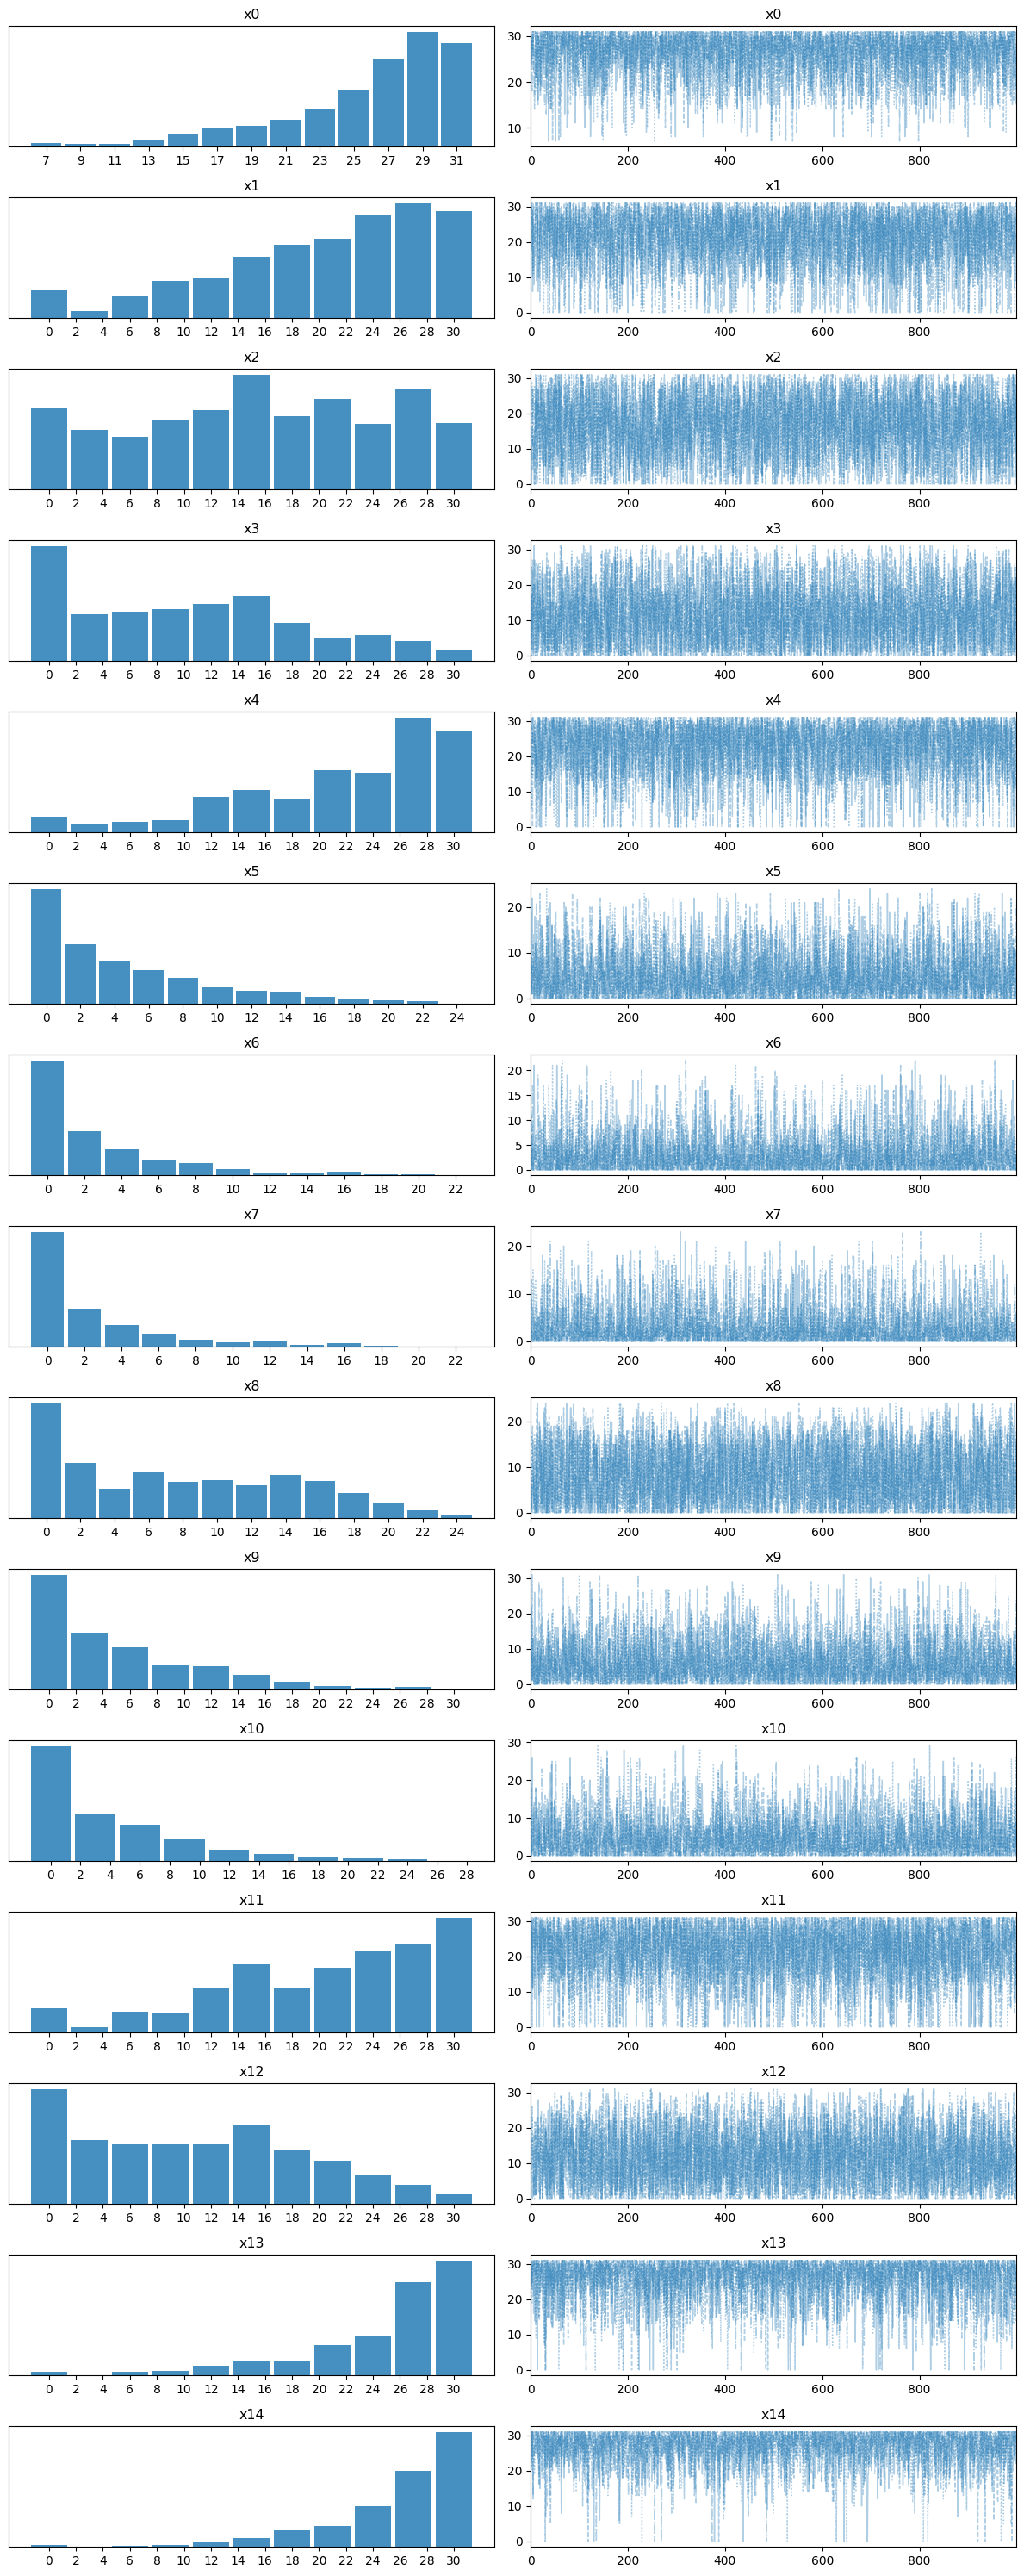

In [6]:
# Plot the posterior
az.plot_trace(trace);
plt.savefig('cmsgen_trace_plot.png', dpi=150);

In [7]:
# [0 0 0 0 1 0 0 0 1 0 0 1 0 1 1]

[trace.posterior.sel(chain=0,draw=i)[['x4','x8','x11','x13','x14']].to_array().sum() for i in range(20)]

[<xarray.DataArray ()>
 array(105)
 Coordinates:
     chain    int64 0
     draw     int64 0,
 <xarray.DataArray ()>
 array(105)
 Coordinates:
     chain    int64 0
     draw     int64 1,
 <xarray.DataArray ()>
 array(105)
 Coordinates:
     chain    int64 0
     draw     int64 2,
 <xarray.DataArray ()>
 array(105)
 Coordinates:
     chain    int64 0
     draw     int64 3,
 <xarray.DataArray ()>
 array(105)
 Coordinates:
     chain    int64 0
     draw     int64 4,
 <xarray.DataArray ()>
 array(105)
 Coordinates:
     chain    int64 0
     draw     int64 5,
 <xarray.DataArray ()>
 array(105)
 Coordinates:
     chain    int64 0
     draw     int64 6,
 <xarray.DataArray ()>
 array(105)
 Coordinates:
     chain    int64 0
     draw     int64 7,
 <xarray.DataArray ()>
 array(105)
 Coordinates:
     chain    int64 0
     draw     int64 8,
 <xarray.DataArray ()>
 array(105)
 Coordinates:
     chain    int64 0
     draw     int64 9,
 <xarray.DataArray ()>
 array(105)
 Coordinates:
     chain 

In [8]:
# Diagnosis
az.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
x0,26.282,5.026,17.0,31.0,0.079,0.056,3962.0,4000.0,1.0
x1,21.263,8.064,7.0,31.0,0.130,0.092,3966.0,3810.0,1.0
x2,16.501,9.237,0.0,30.0,0.145,0.103,4071.0,3917.0,1.0
x3,11.335,8.714,0.0,27.0,0.138,0.098,3848.0,3653.0,1.0
x4,22.619,7.884,7.0,31.0,0.122,0.086,4075.0,4000.0,1.0
x5,5.022,5.287,0.0,15.0,0.081,0.057,4307.0,4223.0,1.0
x6,3.047,3.995,0.0,11.0,0.063,0.045,4063.0,3887.0,1.0
x7,2.930,4.088,0.0,12.0,0.064,0.046,4064.0,3845.0,1.0
x8,8.283,6.740,0.0,19.0,0.109,0.077,3875.0,3796.0,1.0
x9,6.042,6.258,0.0,18.0,0.098,0.069,4173.0,4051.0,1.0


In [12]:
num_vars = Aprime.shape[1]
num_bits = 7 # TODO: use the same variable as for input for the problem
az.to_netcdf(trace, f'roads_SAT_cmsgen_{num_vars}_{num_bits}.nc')

'roads_SAT_cmsgen_15_7.nc'